# Emulating using CNNs


In [2]:
import os
## Ignore my broken HDF5 install...
os.putenv("HDF5_DISABLE_VERSION_CHECK", '1')

In [3]:
import iris

from utils import get_bc_ppe_data

from esem import cnn_model
from esem.utils import get_random_params

import iris.quickplot as qplt
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\h5py\__init__.py:40: UserWarning: h5py is running against HDF5 1.10.6 when it was built against 1.10.5, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


## Read in the parameters and data

In [4]:
ppe_params, ppe_aaod = get_bc_ppe_data()

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\__init__.py:249: IrisDeprecation: setting the 'Future' property 'netcdf_promote' is deprecated and will be removed in a future release. Please remove code that sets this property.
  warn_deprecated(msg.format(name))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\__init__.py:249: IrisDeprecation: setting the 'Future' property 'netcdf_promote' is deprecated and will be removed in a future release. Please remove code that sets this property.
  warn_deprecated(msg.format(name))


In [5]:
## Ensure the time dimension is last - this is treated as the color 'channel'
ppe_aaod.transpose((0,2,3,1))

In [6]:
n_test = 5

X_test, X_train = ppe_params[:n_test], ppe_params[n_test:]
Y_test, Y_train = ppe_aaod[:n_test], ppe_aaod[n_test:]

In [7]:
Y_train

<iris 'Cube' of Absorption optical thickness - total 550nm / (1) (job: 34; latitude: 96; longitude: 192; time: 12)>

## Setup and run the models

In [8]:
model = cnn_model(X_train, Y_train)

In [9]:
model.train()

Epoch 1/100
4/4 [==============================] - 2s 329ms/step - loss: 1.2647 - val_loss: 0.4618
Epoch 2/100
4/4 [==============================] - 1s 172ms/step - loss: 1.1055 - val_loss: 0.4615
Epoch 3/100
4/4 [==============================] - 1s 168ms/step - loss: 1.1964 - val_loss: 0.4610
Epoch 4/100
4/4 [==============================] - 1s 171ms/step - loss: 1.0877 - val_loss: 0.4589
Epoch 5/100
4/4 [==============================] - 1s 172ms/step - loss: 1.3223 - val_loss: 0.4561
Epoch 6/100
4/4 [==============================] - 1s 170ms/step - loss: 1.0132 - val_loss: 0.4535
Epoch 7/100
4/4 [==============================] - 1s 169ms/step - loss: 1.1708 - val_loss: 0.4544
Epoch 8/100
4/4 [==============================] - 1s 177ms/step - loss: 1.2777 - val_loss: 0.4419
Epoch 9/100
4/4 [==============================] - 1s 196ms/step - loss: 1.0134 - val_loss: 0.4406
Epoch 10/100
4/4 [==============================] - 1s 197ms/step - loss: 1.0496 - val_loss: 0.4189
Epoch 11/

In [14]:
m, v = model.predict(X_test.to_numpy())

C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\duncan\miniconda3\envs\gcem_dev\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'sample'.
 

Text(0.5,1,'Difference')

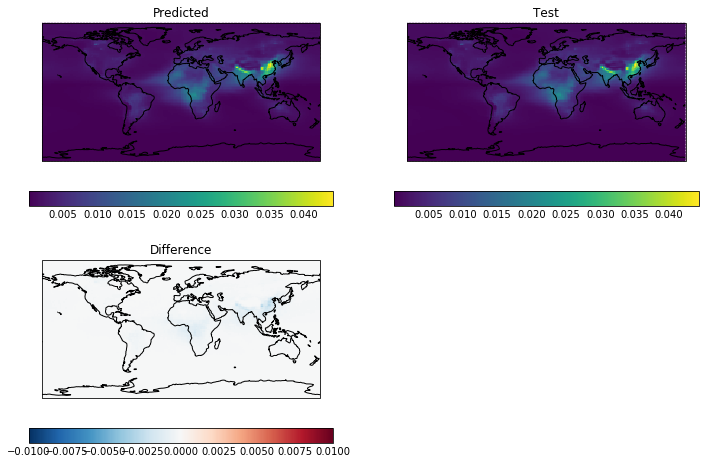

In [15]:
## TODO: Tidy this up a bit
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
qplt.pcolormesh(m[0].collapsed('time', iris.analysis.MEAN))
plt.gca().set_title('Predicted')
plt.gca().coastlines()

plt.subplot(2,2,2)
qplt.pcolormesh(Y_test[0].collapsed('time', iris.analysis.MEAN))
plt.gca().set_title('Test')
plt.gca().coastlines()

plt.subplot(2,2,3)
qplt.pcolormesh((m.collapsed(['sample', 'time'], iris.analysis.MEAN)-Y_test.collapsed(['job', 'time'], iris.analysis.MEAN)), cmap='RdBu_r', vmin=-0.01, vmax=0.01)
plt.gca().coastlines()
plt.gca().set_title('Difference')

In [16]:
m, sd = model.batch_stats(get_random_params(3, int(1e5)), batch_size=1000)

100%|##########| 100000/100000 [26:03<00:00, 44.36sample/s]